In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%config IPCompleter.greedy=True

True

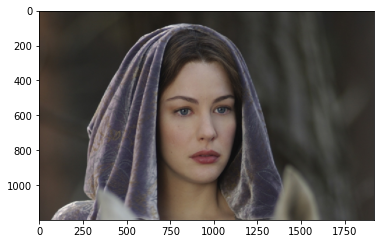

In [3]:
# Nearest Neighbour Mehtod(NNM)
for row in range(zoomedImg.shape[0]):
    # Calculating corresponding pixels in original image 
    source_row = round(row/sf)
    # Overflow handling
    if source_row > img.shape[0]-1: source_row = img.shape[0]-1
    for column in range(zoomedImg.shape[1]):
        # Calculating corresponding pixels in original image        
        source_column = round(column/sf)
        # Overflow handling
        if source_column > img.shape[1]-1: source_column = img.shape[1]-1
        # Assigning pixel values: Nearest Neighbor Method
        if len(img.shape) == 2:
            zoomedImg[row][column] = img[source_row][source_column]
        else:
            for channel in range(3):
                zoomedImg[row][column][channel] = img[source_row][source_column][channel]
plt.imshow(cv.cvtColor(zoomedImg, cv.COLOR_BGR2RGB))
cv.imwrite('LaTeX Report/figures/part3/zoomedNNM.png',zoomedImg)

True

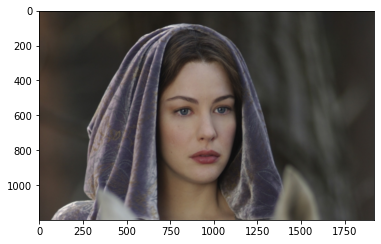

In [9]:
# Bilinear Interpolation Mehtod(BIM)        
for row in range(zoomedImg.shape[0]):
    row_position = row/sf
    row_below = int(np.floor(row_position))
    row_up = int(np.ceil(row_position))
    if row_up > img.shape[0]-1: row_up = img.shape[0]-1
    for column in range(zoomedImg.shape[1]):
        # Calculating corresponding pixels in original image       
        column_position = column/sf
        column_previous = int(np.floor(column_position))
        column_next = int(np.ceil(column_position))
        if column_next > img.shape[1]-1: column_next = img.shape[1]-1
        
        # bilinear interpolation
        diff1 = row_position - row_below 
        diff2 = column_position - column_previous
        if len(img.shape) == 2:
            interVal1 = img[row_below][column_previous]*(1-diff1)\
                        + img[row_up][column_previous]*(diff1)
            interVal2 = img[row_below][column_next]*(1-diff1)\
                        + img[row_up][column_next]*(diff1)
            zoomedImg[row][column] = (interVal1*(1-diff2) + interVal2*(diff2)).astype('uint8')
        else:
            for channel in range(3):
                interVal1 = img[row_below][column_previous][channel]*(1-diff1)\
                        + img[row_up][column_previous][channel]*(diff1)
                interVal2 = img[row_below][column_next][channel]*(1-diff1)\
                        + img[row_up][column_next][channel]*(diff1)
                zoomedImg[row][column][channel] = (interVal1*(1-diff2) + interVal2*(diff2)).astype('uint8')
plt.imshow(cv.cvtColor(zoomedImg, cv.COLOR_BGR2RGB))
cv.imwrite('LaTeX Report/figures/part3/zoomedBIM.png',zoomedImg)

In [7]:
def zoom(image, scaling_factor, method):
    img = image
    sf = scaling_factor   
    if len(img.shape) == 2: # for GRAY_SCALE images
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
    else: # for COLOR images
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
        zoomedImgDims[2] = 3
    # declaring an empty array to store values
    zoomedImg = np.zeros(zoomedImgDims, dtype = img.dtype)
    
    if method == 'nn':# Nearest Neighbour Mehtod(NNM)        
        for row in range(zoomedImg.shape[0]):
            # Calculating corresponding pixels in original image 
            source_row = round(row/sf)
            # Overflow handling
            if source_row > img.shape[0]-1: source_row = img.shape[0]-1
            for column in range(zoomedImg.shape[1]):
                # Calculating corresponding pixels in original image        
                source_column = round(column/sf)
                # Overflow handling
                if source_column > img.shape[1]-1: source_column = img.shape[1]-1
                # Assigning pixel values: Nearest Neighbor Method
                if len(img.shape) == 2:
                    zoomedImg[row][column] = img[source_row][source_column]
                else:
                    for channel in range(3):
                        zoomedImg[row][column][channel] = img[source_row][source_column][channel]
    
    if method == 'bi':# Bilinear Interpolation Mehtod(BIM) 
        for row in range(zoomedImg.shape[0]):
            row_position = row/sf
            row_below = int(np.floor(row_position))
            row_up = int(np.ceil(row_position))
            if row_up > img.shape[0]-1: row_up = img.shape[0]-1
            for column in range(zoomedImg.shape[1]):
                # Calculating corresponding pixels in original image       
                column_position = column/sf
                column_previous = int(np.floor(column_position))
                column_next = int(np.ceil(column_position))
                if column_next > img.shape[1]-1: column_next = img.shape[1]-1

                # bilinear interpolation
                diff1 = row_position - row_below 
                diff2 = column_position - column_previous
                if len(img.shape) == 2:
                    interVal1 = img[row_below][column_previous]*(1-diff1)\
                                + img[row_up][column_previous]*(diff1)
                    interVal2 = img[row_below][column_next]*(1-diff1)\
                                + img[row_up][column_next]*(diff1)
                    zoomedImg[row][column] = (interVal1*(1-diff2) + interVal2*(diff2)).astype('uint8')
                else:
                    for channel in range(3):
                        interVal1 = img[row_below][column_previous][channel]*(1-diff1)\
                                + img[row_up][column_previous][channel]*(diff1)
                        interVal2 = img[row_below][column_next][channel]*(1-diff1)\
                                + img[row_up][column_next][channel]*(diff1)
                        zoomedImg[row][column][channel] = (interVal1*(1-diff2) + interVal2*(diff2)).astype('uint8')
    return zoomedImg

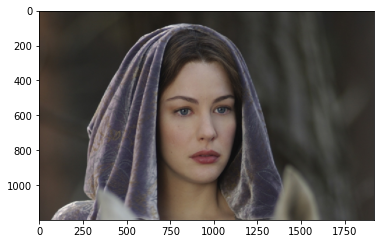

In [8]:
img = cv.imread("../a01images/im02small.png", cv.IMREAD_COLOR)
zoomedImg = zoom(img, 4, 'nn')
plt.imshow(cv.cvtColor(zoomedImg, cv.COLOR_BGR2RGB))
cv.imwrite('LaTeX Report/figures/part3/zoomedImg.png',zoomedImg)